# World Energy Consumption - project 38

**מתן מלמד,
שי יוסקוביץ,
אמונה דנוך,
אריאל תמם**

[קישור למקור מידע](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption)

In [29]:
from IPython.display import Image
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

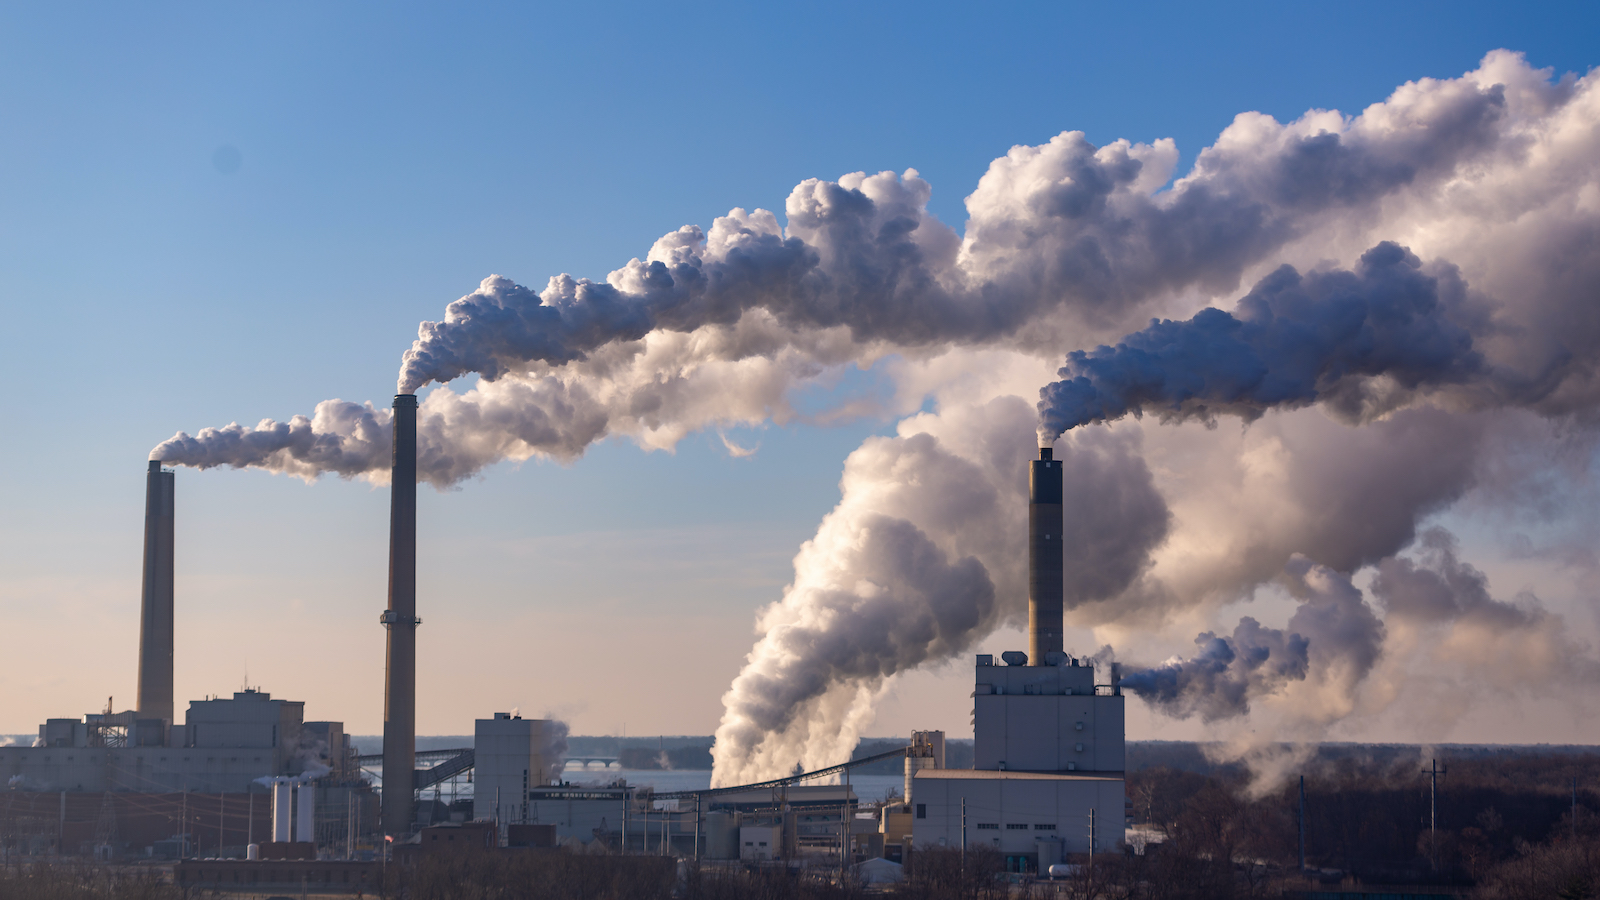

In [30]:
y = Image ('https://grist.org/wp-content/uploads/2020/06/gettyimages-1180072881.jpg', width=300,height=50)
display(y)

קריאת קובץ והצגתו

kilowatt-hours או ב terawatt-hoursכל הנתונים מוצגים ב 

בחודש kilowatt-hours 900 משק בית ממוצע בארה"ב צורך בערך   

**1KW = 1000W**

**1TW=10^12W**

In [31]:
url = 'https://raw.githubusercontent.com/matan19925/data-/main/World%20Energy%20Consumption.csv'
energy_df = pd.read_csv(url)
energy_df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [32]:
energy_df.shape

(17432, 122)

הוספת עמודה חדשה כמות הכסף פר בן אדם

In [33]:
energy_df['gdp_per_capita']=energy_df.gdp/energy_df.population

בחרנו שלוש מדינות כמדגם לשימוש באנרגיה, בשנים 2009-2019

בחרנו דווקא במדינות אלו ביגלל שסין היא מדינת עולם שלישית ומעצמה, נורבגיה מדינה מתפתחת ומיצאת את רוב תוצר האנרגיה המזהמת ומקום ראשון בעולם בשימוש באנרגיה נקייה וישראל מדינה שאנחנו נמצאים בה 

In [34]:
countries = energy_df.loc[(energy_df.country=='Israel') | (energy_df.country == 'China')
|(energy_df.country == 'Norway')]
countries_2009_2019 = countries.loc[(countries.year > 2008)&(countries.year<2020)]

In [35]:
countries_2009_2019 = countries_2009_2019[['iso_code','country','year','energy_per_gdp','energy_per_capita','gas_electricity','coal_electricity',
'fossil_electricity','coal_production','renewables_electricity','gas_production','population','gdp','oil_production','gdp_per_capita','solar_electricity']]

 הוספת עמודה: כמה אנרגייה נקייה יוצרה פר בנאדם

In [36]:
countries_2009_2019['renewables_electricity_per_capita']=countries_2009_2019.gas_electricity/countries_2009_2019.population
countries_2009_2019.head()

,iso_code,country,year,energy_per_gdp,energy_per_capita,gas_electricity,coal_electricity,fossil_electricity,coal_production,renewables_electricity,gas_production,population,gdp,oil_production,gdp_per_capita,solar_electricity,renewables_electricity_per_capita
3454,CHN,China,2009,2.441,19901.852,56.559,2866.547,2993.042,17885.366,611.807,859.398,1.361169e+09,1.110000e+13,2200.191,8154.755070,0.392,4.155178e-08
3455,CHN,China,2010,2.299,21162.747,75.740,3260.754,3398.282,19367.264,752.445,965.446,1.368811e+09,1.260000e+13,2357.220,9205.069163,0.100,5.533269e-08
3456,CHN,China,2011,2.282,22710.792,108.800,3696.100,3866.000,21535.084,766.200,1061.657,1.376498e+09,1.370000e+13,2355.612,9952.792901,0.600,7.904116e-08
3457,CHN,China,2012,2.274,23488.285,110.300,3713.100,3893.900,21789.320,994.280,1114.782,1.384206e+09,1.430000e+13,2409.052,10330.832619,3.600,7.968467e-08
3458,CHN,China,2013,2.248,24222.732,116.400,3980.500,4183.300,22034.153,1077.380,1218.108,1.391883e+09,1.500000e+13,2437.863,10776.767813,8.400,8.362772e-08


In [37]:
countries_2009_2019.isnull().sum()

iso_code                              0
country                               0
year                                  0
energy_per_gdp                        9
energy_per_capita                     0
gas_electricity                       0
coal_electricity                      0
fossil_electricity                    0
coal_production                      22
renewables_electricity                0
gas_production                       11
population                            0
gdp                                   9
oil_production                       11
gdp_per_capita                        9
solar_electricity                     0
renewables_electricity_per_capita     0
dtype: int64

In [38]:
countries_2009_2019.fillna(method='ffill',inplace=True)

## תובנה ראשונה

גרף ימין מתאר את העלייה בצריכה של האנרגיה הנקייה

גרף שמאל מתאר את העלייה של האנרגיה המזוהמת
 
ניתן לראות שהעלייה בגרף ימין חדה לעומת גרף שמאל המתונה יותר. 

השימוש באנרגיה הנקייה הולך וגודל   

<AxesSubplot:xlabel='year', ylabel='renewables_electricity'>

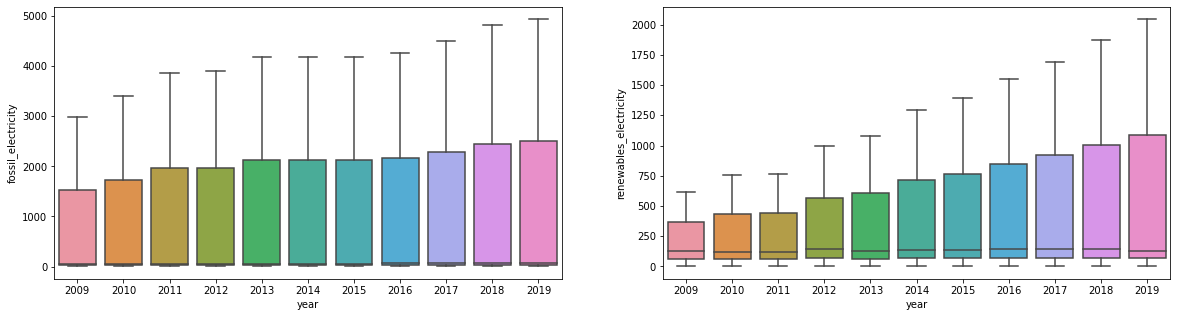

In [39]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data=countries_2009_2019 , x= 'year' ,y='fossil_electricity' , ax=ax[0])
sns.boxplot(data=countries_2009_2019 , x= 'year' ,y='renewables_electricity' , ax=ax[1])

# תובנה שניה

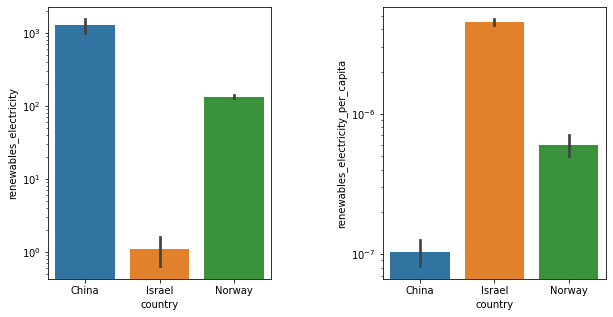

In [40]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
bar_plot = sns.barplot(x='country', y= 'renewables_electricity', data=countries_2009_2019, ax=ax[0])
bar_plot.set_yscale('log')
bar_plot_2= sns.barplot(x='country', y= 'renewables_electricity_per_capita', data=countries_2009_2019,ax=ax[1])
bar_plot_2.set_yscale('log')
plt.show()

 לראות לפי הגרפים שבהיבט העולמי סין ונורווגיה משתמשות יותר באנרגיה נקייה אבל שמסתכלים על האוכלסייה בישראל  אפשר לראות שהשימוש באנרגיה נקייה לנפש היא יותר גדולה

# תובנה שלישית

In [41]:
renewable_energy_2009_2019 = energy_df.loc[energy_df.year > 2008][['country','year','energy_per_gdp','energy_per_capita','gas_electricity','renewables_electricity','population','gdp','gdp_per_capita']]
renewable_energy_2009_2019['renewables_electricity_per_capita'] = renewable_energy_2009_2019.renewables_electricity / renewable_energy_2009_2019.population
renewable_energy_2009_2019 = renewable_energy_2009_2019.dropna()
renewable_energy_2009_2019

,country,year,energy_per_gdp,energy_per_capita,gas_electricity,renewables_electricity,population,gdp,gdp_per_capita,renewables_electricity_per_capita
109,Afghanistan,2009,0.564,944.117,0.162,0.776,28395000.0,4.753980e+10,1674.231309,2.732876e-08
110,Afghanistan,2010,0.676,1137.331,0.185,0.751,29186000.0,4.906888e+10,1681.247309,2.573152e-08
111,Afghanistan,2011,0.844,1494.088,0.252,0.595,30117000.0,5.332634e+10,1770.639041,1.975628e-08
112,Afghanistan,2012,0.681,1292.410,0.174,0.738,31161000.0,5.916690e+10,1898.748443,2.368345e-08
113,Afghanistan,2013,0.521,1016.698,0.218,0.885,32270000.0,6.299370e+10,1952.082393,2.742485e-08
...,...,...,...,...,...,...,...,...,...,...
17424,Zimbabwe,2012,2.722,4251.322,0.000,5.506,13115000.0,2.048226e+10,1561.743118,4.198246e-07
17425,Zimbabwe,2013,2.362,4200.829,0.000,5.115,13350000.0,2.374258e+10,1778.470621,3.831461e-07
17426,Zimbabwe,2014,2.266,4127.801,0.000,5.526,13587000.0,2.474828e+10,1821.467867,4.067123e-07
17427,Zimbabwe,2015,2.223,4027.628,0.000,5.076,13815000.0,2.503057e+10,1811.840028,3.674267e-07


In [42]:
sperrman_renewable_corr = ['renewables_electricity','energy_per_capita','gdp_per_capita', 'renewables_electricity_per_capita']
renewable_correlation_metrix = renewable_energy_2009_2019[sperrman_renewable_corr].corr(method='spearman')
renewable_correlation_metrix

,renewables_electricity,energy_per_capita,gdp_per_capita,renewables_electricity_per_capita
renewables_electricity,1.000000,0.288545,0.307230,0.817288
energy_per_capita,0.288545,1.000000,0.944650,0.419601
gdp_per_capita,0.307230,0.944650,1.000000,0.440792
renewables_electricity_per_capita,0.817288,0.419601,0.440792,1.000000


<AxesSubplot:>

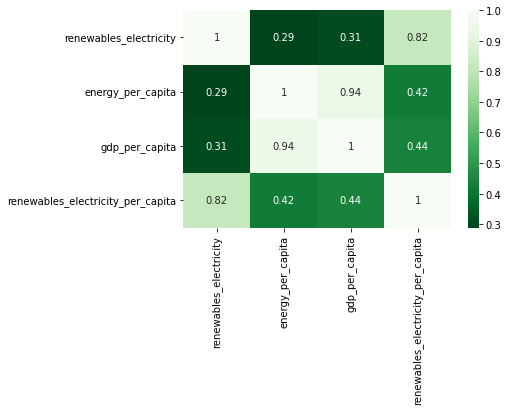

In [43]:
sns.heatmap(data=renewable_correlation_metrix,cmap='Greens_r',annot= True)

התאמה לכל המדינות
ניתן לראות שיש קורלציה מצויינת בין צריכת האנריה לנפש ובין ההכנסה לנפש
יש התאמה פחות טובה לאנרגיה המתחדשת לנפש

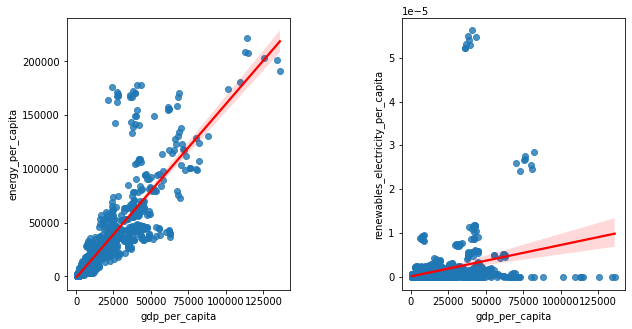

In [44]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.subplots_adjust(wspace=0.5)
regplot1=sns.regplot(data=renewable_energy_2009_2019,x='gdp_per_capita', y='energy_per_capita',line_kws = {"color":'red'},ax=ax[0])
regplot2=sns.regplot(data=renewable_energy_2009_2019,x='gdp_per_capita', y='renewables_electricity_per_capita',line_kws = {"color":'red'},ax=ax[1])
plt.show()

 לסיכום אפשר לראות עלייה בצריכת אנרגייה נקייה במהלך השנים ובאנרגייה המזהמת העלייה יותר נקייה

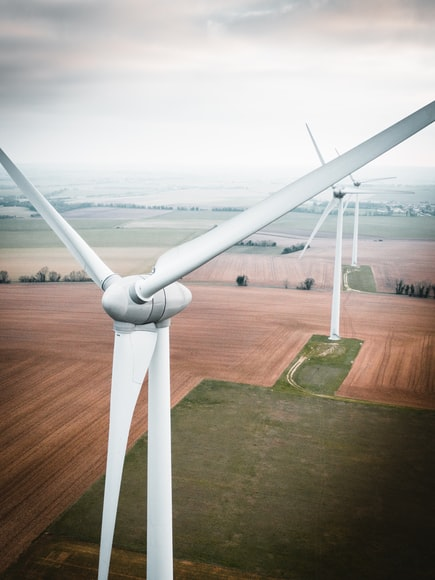

In [45]:
x = Image('https://images.unsplash.com/photo-1548613053-22087dd8edb8?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=435&q=80.jpg', width=300,height=50)
display(x)